<a href="https://colab.research.google.com/github/zidan1708/MyProjects/blob/main/Preprocessing_and_Feature_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 99% 729M/736M [00:13<00:00, 59.1MB/s]
100% 736M/736M [00:13<00:00, 55.3MB/s]


In [ ]:
!unzip *.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [ ]:
!ls

dataset  drive	eye-diseases-classification.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [ ]:
cataract = Path('/content/drive/MyDrive/archive/dataset/cataract')
diabetic_retinopathy = Path('/content/drive/MyDrive/archive/dataset/diabetic_retinopathy')
glaucoma = Path('/content/drive/MyDrive/archive/dataset/glaucoma')
normal = Path('/content/drive/MyDrive/archive/dataset/normal')



###Data Cleaning

In [ ]:
eye_disease_df = pd.DataFrame()
from tqdm import tqdm
for imagepath in tqdm(list(cataract.iterdir()), desc='cataract'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 0
    }, ignore_index=True)

for imagepath in tqdm(list(diabetic_retinopathy.iterdir()), desc='diabetic_retinopathy'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 1
    }, ignore_index=True)

for imagepath in tqdm(list(glaucoma.iterdir()), desc='glaucoma'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 2
    }, ignore_index=True)

for imagepath in tqdm(list(normal.iterdir()), desc='normal'):
    eye_disease_df = eye_disease_df.append({
        'image': str(imagepath),
        'eye_disease_type': 3
    }, ignore_index=True)

data_frame = '/../dataset.pickle'
print(f'Saving Dataframe to: {data_frame}')
eye_disease_df.to_pickle(data_frame)

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-90-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-90-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-90-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-90-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eye_disease_df = eye_disease_df.append({
<ipython-input-90-22d1a7154474>:10: FutureWarning: The frame.append method is deprecated and 

Saving Dataframe to: /../dataset.pickle


In [ ]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
    print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

In [ ]:
!ls

dataset		drive				 kaggle.json
dataset.pickle	eye-diseases-classification.zip  sample_data


['normal', 'glaucoma', 'cataract', 'diabetic_retinopathy']


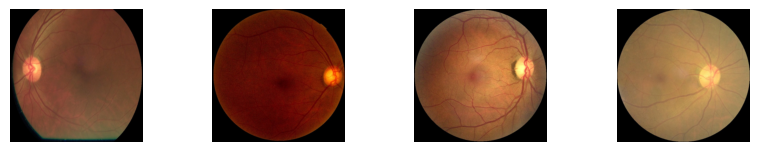

In [ ]:
data,result = load_images("/content/drive/MyDrive/archive/dataset/")

In [ ]:
print(np.array(data))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [ ]:
t = pd.Series(result,dtype='category').cat.codes

In [ ]:
t.value_counts()

1    1108
3    1074
0    1038
2    1017
dtype: int64

In [ ]:
t.value_counts()

1    1108
3    1074
0    1038
2    1017
dtype: int64

###Handling Data Duplicate

In [ ]:
t = t.drop_duplicates()

In [ ]:
df = pd.DataFrame(t)

In [ ]:
df

,0
0,3
1074,2
2091,0
3129,1


###Labelling


Label Kolom

In [ ]:
df = pd.DataFrame(t, columns = ['kelas'])

In [ ]:
df

,kelas
0,3
1074,2
2091,0
3129,1


Label Class

In [ ]:
df = df['kelas'].map({3:'normal', 2:'glaucoma', 1:'diabetic_retinopathy', 0:'cataract'})

In [ ]:
df

0                     normal
1074                glaucoma
2091                cataract
3129    diabetic_retinopathy
Name: kelas, dtype: object